<h1>Time Series Transformation</h1>

<h2 align="center">Aggregation</h2>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2023-10-01 00:00:00
2023-10-31 23:45:00


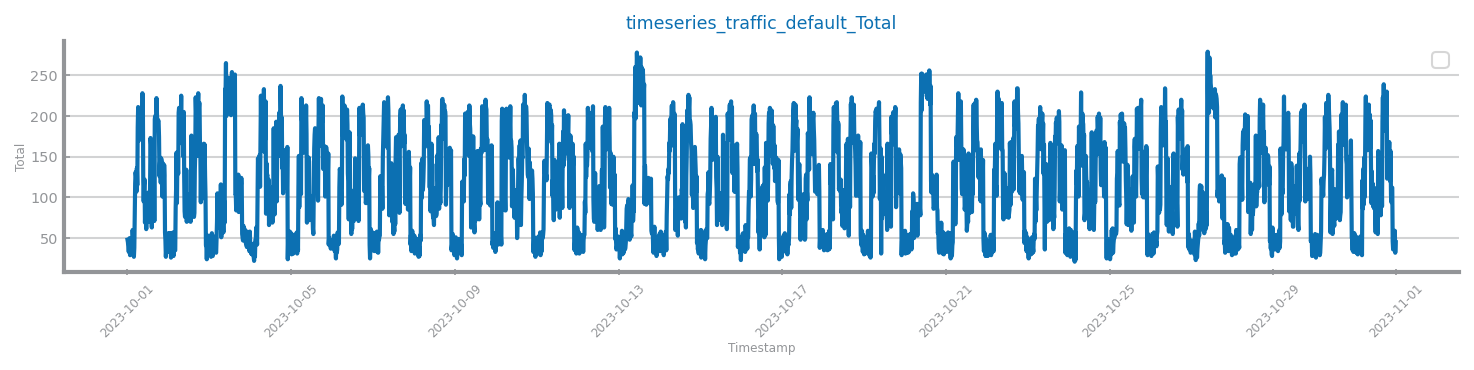

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


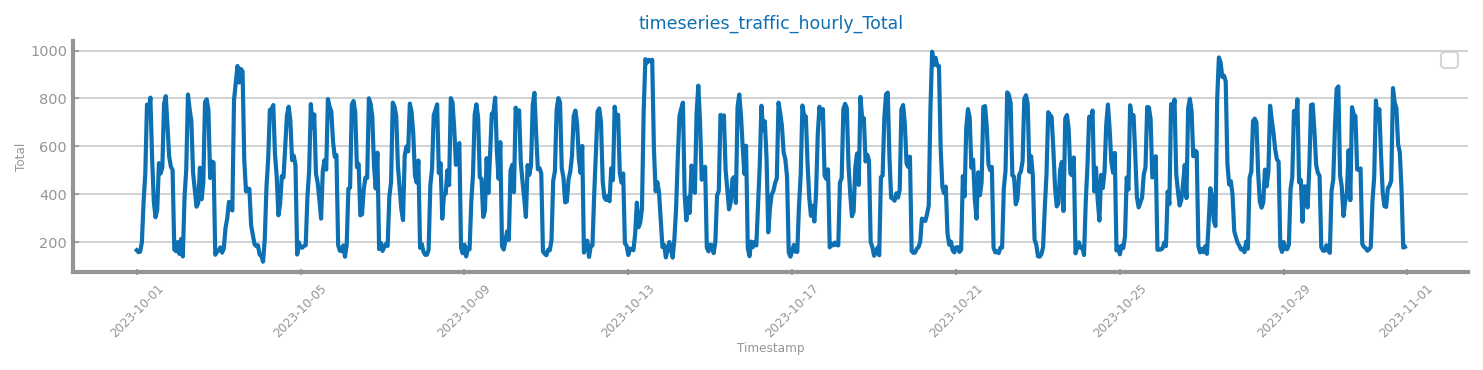

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


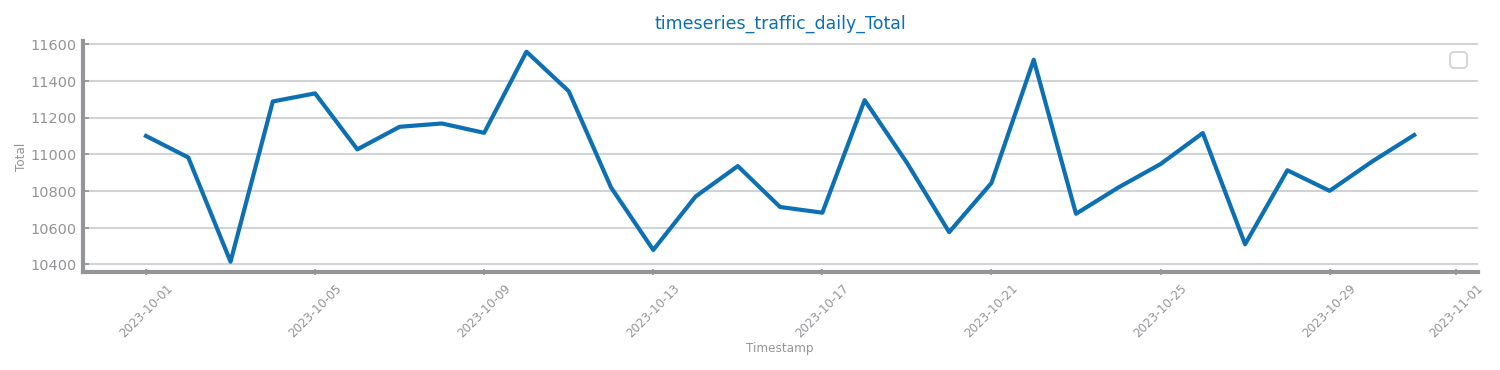

In [9]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT

file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
data = data.sort_values(['Timestamp'], ascending=True)
series: Series = data[target]
print(series.index[0])
print(series.index[-1])
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag}_default_{target}",
)
plt.savefig(f"{file_tag}_default_{target}")
show()
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg: Series = ts_aggregation_by(series, gran_level="H", agg_func="sum")
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag}_hourly_{target}",
)
plt.savefig(f"{file_tag}_hourly_{target}")
show()
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
ss_agg: Series = ts_aggregation_by(series, gran_level="D", agg_func="sum")
plot_line_chart(
    ss_agg.index.to_list(),
    ss_agg.to_list(),
    xlabel=ss_agg.index.name,
    ylabel=target,
    title=f"{file_tag}_daily_{target}",
)
plt.savefig(f"{file_tag}_daily_{target}")
show()

gran='S'
Mean Squared Error: 3357.889309359148
R-squared: -0.001306433091169401
gran='H'
Mean Squared Error: 46864.8143109113
R-squared: -0.0011491329634654157
gran='D'
Mean Squared Error: 30809.362068905233
R-squared: -1.5898517545142283


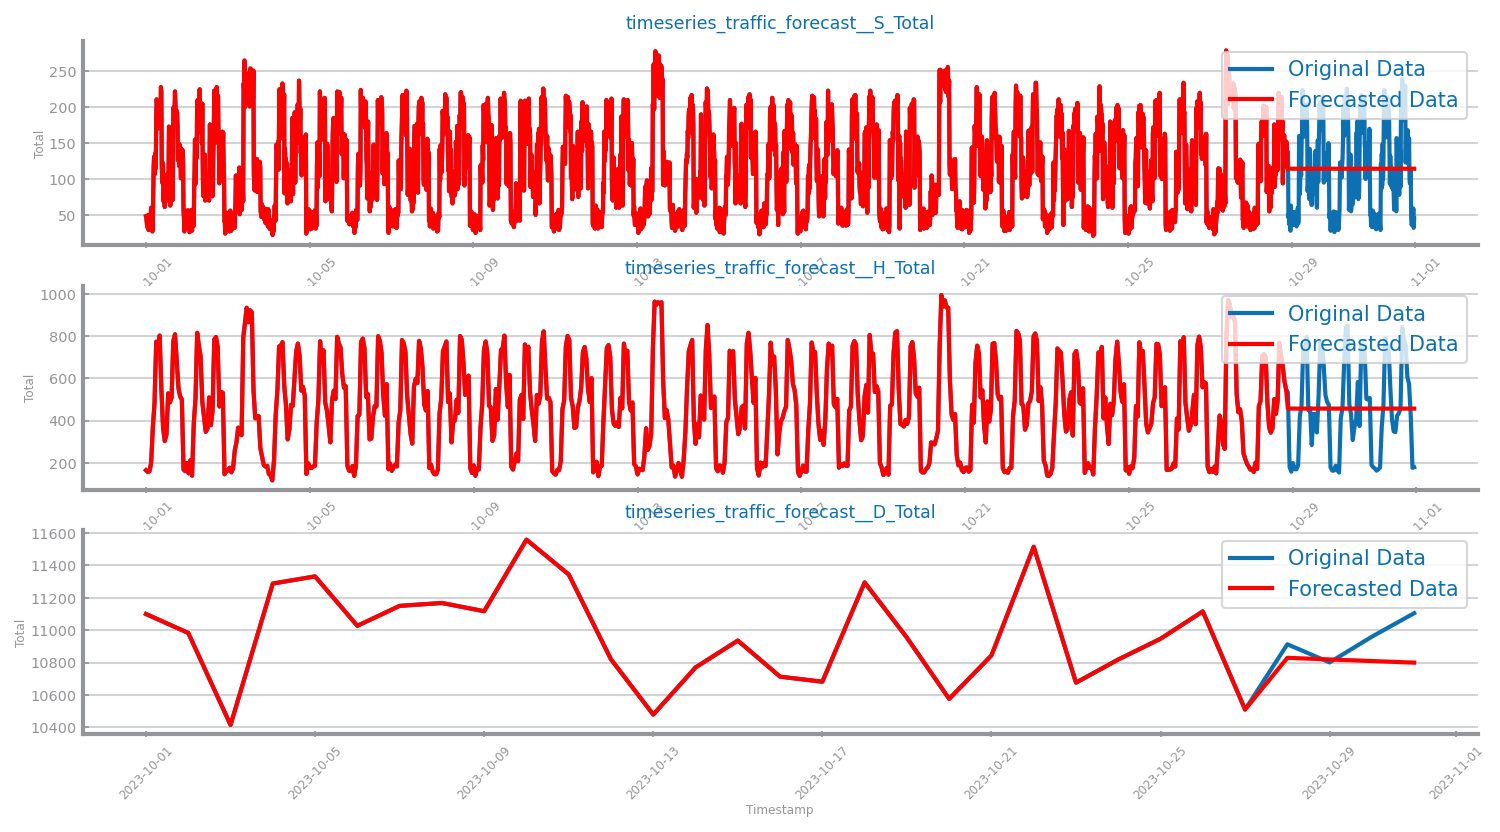

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from dslabs_functions import series_train_test_split
import pandas as pd
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from dslabs_functions import plot_line_chart, ts_aggregation_by, HEIGHT
from matplotlib.pyplot import subplots


file_tag = "timeseries_traffic"
target = "Total"
data: DataFrame = read_csv(
    "../../../data/forecast_traffic_single.csv",
    index_col="Timestamp",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
data = data.sort_values(['Timestamp'], ascending=True)
granularities=["S", "H", "D"]
fig, axs = subplots(len(granularities), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(granularities)))

for i, gran in enumerate(granularities):
    series: Series = data[target]
    series: Series = ts_aggregation_by(series, gran_level=gran, agg_func="sum")

    # Assuming 'series' is your time series data
    train_series, test_series = series_train_test_split(series)


    # Creating the predictor variable (X) - using timestamps directly
    X_train = train_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)
    X_test = test_series.index.values.astype('datetime64[s]').astype(int).reshape(-1, 1)

    # Reshape the target variable (y)
    y_train = train_series.values
    y_test = test_series.values
    # print(y_train)
    # Initializing and fitting the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Making predictions on the test set
    predictions = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)

    print(f"{gran=}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r_squared}")

    future_timestamps = test_series.index  # Change this to your future timestamps

    # Creating a pandas Series for the forecasted values with the corresponding timestamps
    forecast_series = pd.Series(predictions.flatten(), index=future_timestamps)

    # Optionally, you can concatenate the train_series and forecast_series for visualization or further analysis
    combined_series = pd.concat([train_series, forecast_series])

    plot_line_chart(
        series.index.to_list(),
        series.to_list(),
        ax=axs[i],
        xlabel=series.index.name,
        ylabel=target,
        title=f"{file_tag}_forecast_{gran}_{target}",
        name='Original Data'
    )
    plot_line_chart(
        combined_series.index.to_list(),
        combined_series.to_list(),
        ax=axs[i],
        xlabel=series.index.name,
        ylabel=target,
        title=f"{file_tag}_forecast__{gran}_{target}",
        color='RED',
        name='Forecasted Data'
    )

plt.savefig(f"{file_tag}_forecast_{target}")
show()
